In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import to_rgba
import sys
import os
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/work/ccnr/glover.co/net_design/NetDesign')
import network_design as nd

In [127]:
def get_networks(parent_dir,component_num = 2):
    eco_networks = os.listdir(parent_dir)[1:]
    original_networks_files = [name for name in eco_networks if not os.path.isdir(os.path.join(eco_path, name))]
    original_networks = [nx.read_edgelist(eco_path + '/'+g,edgetype=str,delimiter = ',') for g in original_networks_files]
    idx = [i for i,g in enumerate(original_networks) if nx.is_connected(g)]
    recon_dirs = [name for name in eco_networks if (os.path.isdir(os.path.join(eco_path, name)) and name[-1] == str(component_num))]
    return original_networks, original_networks_files, recon_dirs,idx

In [132]:
eco_path = '/work/ccnr/glover.co/net_design/NetDesign/data/EcoNets/'
# eco_networks = os.listdir(eco_path)[1:]
# os.path.isdir(os.path.join(eco_networks, eco_networks[0]))
# [name for name in eco_networks if not os.path.isdir(os.path.join(eco_networks, name))]
networks, graph_names, recon_dirs, idx = get_networks(eco_path)

In [133]:
from itertools import compress

In [134]:
networks = list(compress(networks,idx))
graph_names = list(compress(graph_names,idx))
recon_dirs = list(compress(recon_dirs,idx))

In [136]:
len(networks), len(idx)

(221, 222)

In [137]:
pairs = []
for cur_dir in recon_dirs:
    name = cur_dir[:-8]
    idx = graph_names.index(name + '.txt')
    graphs = [f for f in os.listdir(eco_path + cur_dir) if f[0] == 'g']
    for g in graphs:
        pairs.append((idx,networks[idx],nx.read_edgelist(eco_path + cur_dir+'/'+g),float(g[13:-4])))

In [138]:
indices = np.linspace(1,40,20,dtype=int)

In [139]:
iso_count = np.zeros((len(indices),len(graph_names)))
iso_true_false = np.zeros((len(indices),len(graph_names)))
num_components = np.zeros((len(indices),len(graph_names)))
for p in pairs:
    i = np.where(indices == int(p[3]))[0]
    j = p[0]
    components = list(nx.connected_components(p[2]))
    num_components[i,j] = len(components)
    # for c in components:
    #     iso_count[i,j] += nx.is_isomorphic(p[1],nx.subgraph(p[2],c))
    # iso_true_false[i,j] += nx.is_isomorphic(nx.disjoint_union(p[1],p[1]),p[2])

In [140]:
size = [g.number_of_nodes() for g in networks]


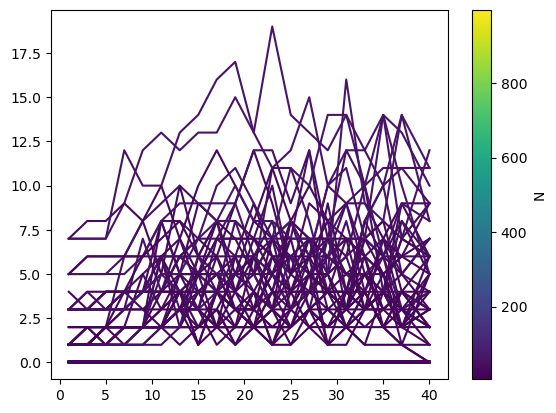

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
fig, ax = plt.subplots()
norm = mcolors.Normalize(vmin=min(size), vmax=max(size))
cmap = cm.viridis
for i in range(len(graph_names)):
    color = cmap(norm(size[i]))

    ax.plot(indices,num_components[:,i],color=color)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(size), vmax=max(size)))
plt.colorbar(sm, label='N',ax=ax)


In [169]:
num_components = np.zeros((len(recon_dirs),20))
size = np.zeros(len(recon_dirs))
for i,cur_dir in enumerate(recon_dirs):
    graphs = [f for f in os.listdir(eco_path + cur_dir) if f[0] == 'g']
    for g in graphs:
        detachment_rate = int(float(g[13:-4]))
        idx = np.where(detachment_rate == indices)[0]
        num_components[i,idx] = len(list(nx.connected_components(nx.read_edgelist(eco_path + cur_dir + '/' + g))))
    size[i] = nx.read_edgelist(eco_path + cur_dir + '/' + g).number_of_nodes()/2

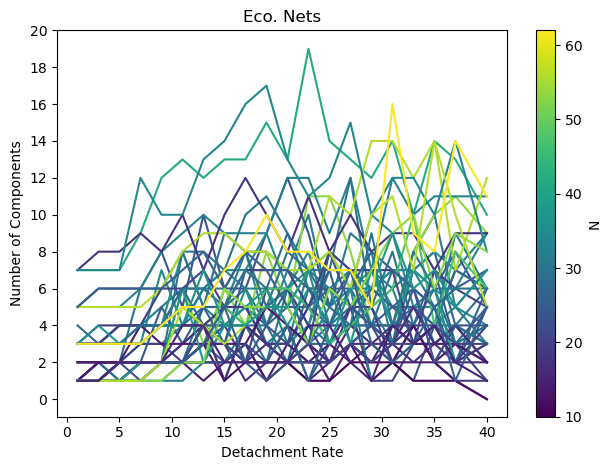

In [175]:
fig, ax = plt.subplots()
norm = mcolors.Normalize(vmin=min(size), vmax=max(size))
cmap = cm.viridis
for i in range(len(num_components)):
    color = cmap(norm(size[i]))
    ax.plot(indices,num_components[i],color=color)
ax.set_yticks(np.arange(0,22,2),np.arange(0,22,2))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(size), vmax=max(size)))
plt.colorbar(sm, label='N',ax=ax)
plt.title('Eco. Nets')
plt.xlabel('Detachment Rate')
plt.ylabel('Number of Components')
plt.tight_layout()
plt.savefig('../eco_num_comp.png')
plt.show()

In [4]:
dirs = [name for name in os.listdir(eco_path)[1:] if os.path.isdir(os.path.join(eco_path, name))]

In [5]:
new_networks = os.listdir(eco_path+eco_networks[1])

In [47]:
max_comp = np.zeros((len(dirs),20))
for i, cur_dir in enumerate(dirs):
    new_networks = os.listdir(eco_path + cur_dir)
    try:
        for j, comp in enumerate(new_networks[:20]):
            comp_sizes = np.loadtxt(eco_path+cur_dir+'/'+comp)
            max_comp[i,j] = np.max(comp_sizes) / 
    except:
        max_comp[i] = np.nan

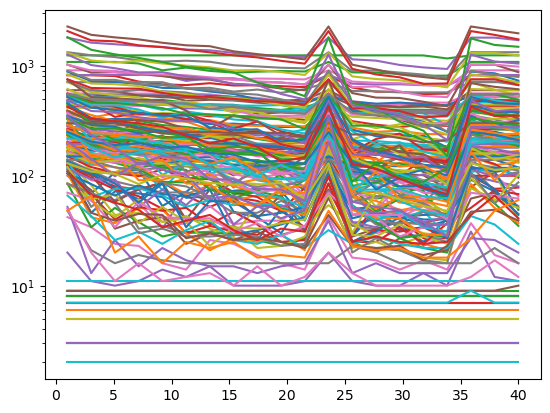

In [50]:
for i in range(len(dirs)):
    plt.semilogy(np.linspace(1,40,20),max_comp[i])

In [ ]:
max_iso = np.zeros((len(dirs),20))
for i, cur_dir in enumerate(dirs):
    # Get original network
    original_network = nx.read_edgelist(eco_path + cur_dir[:-6] + '.txt',edgetype=str,delimiter=',')
    new_networks = os.listdir(eco_path + cur_dir)
    counter = 0
    for g_file in new_networks:
        try:
            g = nx.read_edgelist(eco_path + cur_dir + '/' + g_file)
                # Get connected components
            components = list(nx.connected_components(g))
            iso_count = 0
            for c in components:
                iso_count += nx.is_isomorphic(original_network,nx.subgraph(g,c))
            max_iso[i,counter] = iso_count
            counter += 1
        except:
            continue

        

In [ ]:
max_iso